# Loop operators

To define operators acting on more than two sites at the time, we have introduced the notion of *Loop operators*. To use it in te definition of Hamiltonians and global operators, we need to include a definition of generic loops in the geometry.

In the example, we generalize the *open square lattice* to include unit cells with *loops*:
```
<UNITCELL name="simple with loop" dimension="2">
  <VERTEX/>
  <EDGE><SOURCE vertex="1" offset="0 0"/><TARGET vertex="1" offset="0 1"/></EDGE>
  <EDGE><SOURCE vertex="1" offset="0 0"/><TARGET vertex="1" offset="1 0"/></EDGE>
  <LOOP>
    <NODE vertex="1" offset="0 0"/>
    <NODE vertex="1" offset="1 0"/>
    <NODE vertex="1" offset="1 1"/>
  </LOOP>
</UNITCELL>
```

```
<LATTICEGRAPH name = "square lattice with loop">
  <FINITELATTICE>
    <LATTICE ref="square lattice"/>
    <EXTENT dimension="1" size ="L"/>
    <EXTENT dimension="2" size ="L"/>
    <BOUNDARY type="open"/>
  </FINITELATTICE>
  <UNITCELL ref="simple with loop"/>
</LATTICEGRAPH>
```

A loop is a sequence of *nodes*, i.e. vertices relative to the given reference unit cell. In the example, we define a reference loop on the square lattice involving the unique vertex in the unit cell, the vertex in the cell at the right, and a vertex in the diagonal.



Now we have defined loops in the lattice, we can define global operators in a model, which are linear combinations of products of operators on each site of the node. For example, 

```
<HAMILTONIAN name="spin loop">
  <PARAMETER name="J0" default="0"/>
  <PARAMETER name="J" default="J0"/>
  <PARAMETER name="h" default="0"/>
  <PARAMETER name="Wilson" default="0"/>
  <BASIS ref="spin"/>
  <SITETERM site="i">
  <PARAMETER name="h#" default="h"/>
  <PARAMETER name="Gamma#" default="Gamma"/>
  <PARAMETER name="D#" default="D"/>
    -h#*Sz(i)
  </SITETERM> 
  <BONDTERM source="i" target="j">
    <PARAMETER name="J#" default="0"/>
    J#*Sz(i)*Sz(j)+J#*exchange_xy(i,j)
  </BONDTERM>
  <LOOPTERM indices="i j k">
    <PARAMETER name="Wilson#" default="Wilson"/>
    Wilson# *  (Sx(i)*Sy(j)*Sz(k) - Sx(i)*Sz(j)*Sy(k) +Sz(i)*Sx(j)*Sy(k) - Sz(i)*Sx(j)*Sy(k) +Sy(i)*Sz(j)*Sx(k) - Sy(i)*Sx(j)*Sz(k) )
  </LOOPTERM>
</HAMILTONIAN>

```
defines a Hamiltonian with three body terms of the form $\vec{\bf S}_i\cdot(\vec{\bf S}_j\times \vec{\bf S}_k)$ over each loop defined on the lattice.

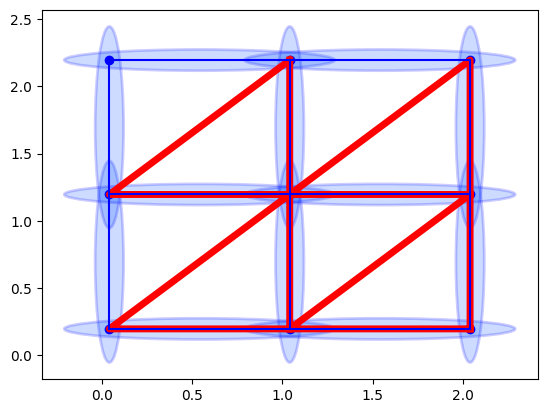

In [7]:
from matplotlib import pyplot as plt
from IPython.display import Latex, Math, clear_output, display


from qalma import (list_models_in_alps_xml,
                       list_geometries_in_alps_xml,
                       graph_from_alps_xml,
                       model_from_alps_xml)
from qalma.model import SystemDescriptor
from qalma.operators.states.meanfield.variational import variational_quadratic_mfa
from qalma.operators import SumOperator
from qalma.utils import draw_operator
models = sorted(list_models_in_alps_xml())
geometries = sorted(list_geometries_in_alps_xml())


latt_descr = graph_from_alps_xml(name="square lattice with loop",parms={"L":3,"a":1})
model_descr=model_from_alps_xml(name="spin loop")


SYSTEM=SystemDescriptor(latt_descr,model_descr,{"Jz":-1, "Jxy":-1,"Jz2":-1, "Jxy2":-1,"Jz3":-1, "Jxy3":-1,"Jz4":-1, "Jxy4":-1,"Wilson":32})
HAMILTONIAN = SYSTEM.global_operator("Hamiltonian")


fig, ax = plt.subplots()
draw_operator(HAMILTONIAN, ax)
SYSTEM.spec["graph"].draw(ax)

In [13]:
SYSTEM.spec["graph"].loops

{'0': [['1[0, 0]', '1[1, 0]', '1[1, 1]'],
  ['1[1, 0]', '1[2, 0]', '1[2, 1]'],
  ['1[0, 1]', '1[1, 1]', '1[1, 2]'],
  ['1[1, 1]', '1[2, 1]', '1[2, 2]']]}

In [14]:
print("Three body terms:")
for t in HAMILTONIAN.terms:
    if len(t.acts_over())==3:
        display(t)

Three body terms:


qutip interface operator for 1 x  
Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+8.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-8.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+8.j 0.-8.j 0.+0.j]
 [0.+0.j 0.-8.j 0.+8.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-8.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+8.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

qutip interface operator for 1 x  
Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+8.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-8.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+8.j 0.-8.j 0.+0.j]
 [0.+0.j 0.-8.j 0.+8.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-8.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+8.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

qutip interface operator for 1 x  
Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+8.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-8.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+8.j 0.-8.j 0.+0.j]
 [0.+0.j 0.-8.j 0.+8.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-8.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+8.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

qutip interface operator for 1 x  
Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+8.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-8.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+8.j 0.-8.j 0.+0.j]
 [0.+0.j 0.-8.j 0.+8.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-8.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+8.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

Text(0.5, 1.0, 'Spectrum')

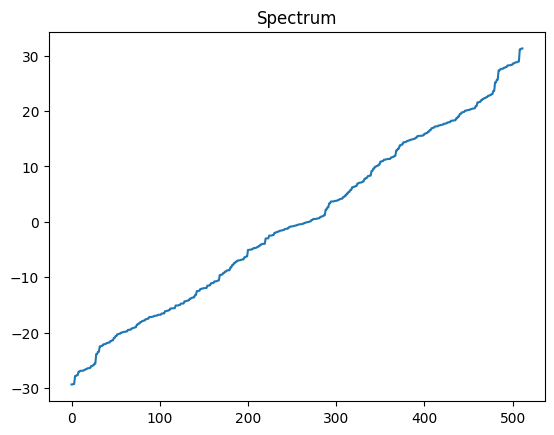

In [15]:
plt.plot(HAMILTONIAN.eigenenergies())
plt.title("Spectrum")